In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_NN_5.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,NaN,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,NaN,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,NaN,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,NaN,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,NaN,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,1.160,0.000,0.000,3.121,NaN,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,NaN,0.0,NaN,0.000,0.409,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,NaN,0.000,1.189,5.0,69.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	232
float64		column 2	232
float64		column 3	265
float64		column 4	174
float64		column 5	203
float64		column 6	261
float64		column 7	207
float64		column 8	236
float64		column 9	116
float64		column 10	261
float64		column 11	232
float64		column 12	232
float64		column 13	145
float64		column 14	203
float64		column 15	203
float64		column 16	348
float64		column 17	203
float64		column 18	232
float64		column 19	203
float64		column 20	203
float64		column 21	265
float64		column 22	203
float64		column 23	323
float64		column 24	294
float64		column 25	236
float64		column 26	323
float64		column 27	348
float64		column 28	319
float64		column 29	203
float64		column 30	265
float64		column 31	116
float64		column 32	319
float64		column 33	145
float64		column 34	290
float64		column 35	232
float64		column 36	87
float64		column 37	261
float64		column 38	232
float64		column 39	29
float64		column 40	406
float64		column 41	203
float64		column 42	232
float64

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4365.000000,4365.000000,4332.000000,4423.000000,4394.000000,4336.000000,4390.000000,4361.000000,4481.000000,4336.000000,...,4361.000000,4510.000000,4394.000000,4394.000000,4274.000000,4390.000000,4394.000000,4365.000000,4365.000000,4423.000000
mean,0.098683,0.204545,0.272461,0.063636,0.302196,0.092119,0.110185,0.098019,0.087677,0.229712,...,0.029995,0.038844,0.135941,0.016547,0.262979,0.071280,0.041881,5.135979,51.024742,273.947999
std,0.285501,1.249758,0.490609,1.393617,0.651400,0.268008,0.388839,0.355886,0.276517,0.633050,...,0.279108,0.245551,0.259660,0.110466,0.821113,0.221481,0.422422,32.245666,196.628400,581.111911
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.597000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,94.000000
75%,0.000000,0.000000,0.410000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.140000,...,0.000000,0.000000,0.184750,0.000000,0.310000,0.048000,0.000000,3.705000,43.000000,261.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,6.060000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,5.300000,19.829000,1102.500000,9989.000000,15841.000000


<AxesSubplot:>

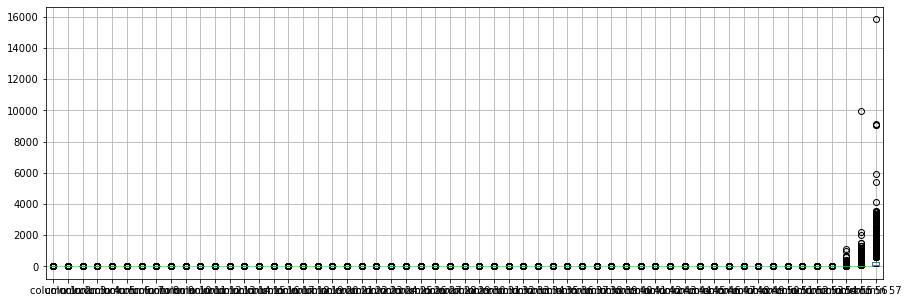

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.098683
column 2       0.204545
column 3       0.272461
column 4       0.063636
column 5       0.302196
column 6       0.092119
column 7       0.110185
column 8       0.098019
column 9       0.087677
column 10      0.229712
column 11      0.057315
column 12      0.525956
column 13      0.090663
column 14      0.055701
column 15      0.048195
column 16      0.228811
column 17      0.140995
column 18      0.178855
column 19      1.656832
column 20      0.084747
column 21      0.793373
column 22      0.121213
column 23      0.095297
column 24      0.091236
column 25      0.532428
column 26      0.248601
column 27      0.702057
column 28      0.114072
column 29      0.094891
column 30      0.096865
column 31      0.065233
column 32      0.042024
column 33      0.095389
column 34      0.045066
column 35      0.100149
column 36      0.096690
column 37      0.129737
column 38      0.012898
column 39      0.076751
column 40      0.061759
column 41      0.041554
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.011979,0.060628,0.017509,0.021151,0.053733,0.004662,0.003598,0.107362,0.036620,...,-0.016858,-0.025925,-0.028127,-0.031098,0.047329,0.145417,-0.004126,0.049773,0.061170,0.099344
column 2,-0.011979,1.000000,-0.027991,-0.006562,-0.023830,-0.022855,0.005752,-0.016781,-0.002862,0.025272,...,-0.014522,-0.005834,-0.049722,-0.017434,-0.015756,-0.008090,0.003131,0.003226,0.000563,-0.022690
column 3,0.060628,-0.027991,1.000000,-0.020078,0.080616,0.092424,0.033675,0.013450,0.081578,0.039905,...,-0.024371,-0.032247,-0.005432,-0.028494,0.092443,0.100469,-0.001407,0.081115,0.090237,0.076281
column 4,0.017509,-0.006562,-0.020078,1.000000,0.004812,-0.005598,0.016268,0.006693,-0.001292,-0.005320,...,-0.000786,-0.000095,-0.010594,-0.006750,-0.002057,0.011164,-0.001790,0.003418,0.020225,0.018641
column 5,0.021151,-0.023830,0.080616,0.004812,1.000000,0.056724,0.129528,0.035841,0.024386,0.029697,...,-0.029102,-0.036327,-0.044421,-0.024203,0.019917,0.051123,0.004592,0.055768,0.052020,0.011359
column 6,0.053733,-0.022855,0.092424,-0.005598,0.056724,1.000000,0.061179,0.099433,0.113613,0.008330,...,-0.029185,-0.016077,-0.020025,-0.023186,0.060607,0.089131,0.022614,-0.008478,0.078252,0.087606
column 7,0.004662,0.005752,0.033675,0.016268,0.129528,0.061179,1.000000,0.041918,0.040941,0.047958,...,-0.029129,-0.032305,-0.046518,-0.026231,0.048671,0.070862,0.049534,0.034574,0.053121,-0.005464
column 8,0.003598,-0.016781,0.013450,0.006693,0.035841,0.099433,0.041918,1.000000,0.118879,0.074592,...,-0.022196,-0.028041,-0.026970,-0.019381,0.037334,0.071887,-0.007779,0.008711,0.039697,0.051482
column 9,0.107362,-0.002862,0.081578,-0.001292,0.024386,0.113613,0.040941,0.118879,1.000000,0.110208,...,-0.023465,-0.014312,-0.026156,0.012822,0.042297,0.145855,0.001450,0.104879,0.168538,0.249832
column 10,0.036620,0.025272,0.039905,-0.005320,0.029697,0.008330,0.047958,0.074592,0.110208,1.000000,...,-0.024697,0.014111,0.002533,0.005236,0.034205,0.078368,0.035175,0.072264,0.087838,0.085969


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+12,17+12+12,17+12+12+12,17+12+12,17+12,17], vae_layer = False, seed = 120)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 636.6666605347956
Epoch: 1 , loss: 630.7933615707769
Epoch: 2 , loss: 630.276690493062
Epoch: 3 , loss: 630.0098009807308
Epoch: 4 , loss: 625.5380348976481
Epoch: 5 , loss: 623.9485380591416
Epoch: 6 , loss: 629.3547556807355
Epoch: 7 , loss: 628.3431416687649
Epoch: 8 , loss: 631.3689442810696
Epoch: 9 , loss: 628.3423767355677
Epoch: 10 , loss: 625.6273726885327
Epoch: 11 , loss: 626.1326243968791
Epoch: 12 , loss: 613.7931893644433
Epoch: 13 , loss: 590.1239528057882
Epoch: 14 , loss: 534.4956029167574
Epoch: 15 , loss: 518.913796561105
Epoch: 16 , loss: 505.2630479393936
Epoch: 17 , loss: 498.1062162977478
Epoch: 18 , loss: 478.9806403715021
Epoch: 19 , loss: 486.4538686400091
Epoch: 20 , loss: 501.81123593958415
Epoch: 21 , loss: 474.42931368625125
Epoch: 22 , loss: 475.49828460906025
Epoch: 23 , loss: 489.6651283822409
Epoch: 24 , loss: 497.18532790871865
Epoch: 25 , loss: 488.072376955677
Epoch

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000000
column 2      0.000000
column 3      0.000000
column 4      0.000000
column 5      0.000000
column 6      0.000000
column 7      0.000000
column 8      0.000000
column 9      0.000000
column 10     0.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     0.000000
column 15    -0.039300
column 16     0.000000
column 17     0.000000
column 18     0.000000
column 19     0.000000
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     0.000000
column 32     0.000000
column 33     0.000000
column 34     0.000000
column 35     0.000000
column 36     0.000000
column 37     0.000000
column 38     0.000000
column 39     0.000000
column 40     0.000000
column 41     0.000000
column 42     0.000000
column 43     0.000000
column 44  

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,3.280068,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.068416,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,-0.111773,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.197979,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.104097,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,-6.368898,0.0
4593,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
4594,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.043020,0.0,0.052413,0.000000,0.0,0.0,0.000000,0.0
4595,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.054651,0.0,0.0,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

15015.66334492721

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [18]:
NRMS=numerator/denominator
NRMS


0.3163946335748727

In [19]:
new_df.iloc[66,:]

column 1       0.050684
column 2       0.440000
column 3       0.890000
column 4       0.000000
column 5       0.440000
column 6       0.000000
column 7       0.000000
column 8       0.000000
column 9       0.000000
column 10      0.000000
column 11      0.000000
column 12      0.440000
column 13      0.000000
column 14      0.000000
column 15      0.000000
column 16      0.440000
column 17      0.000000
column 18      0.890000
column 19      2.240000
column 20      0.000000
column 21      1.340000
column 22      0.000000
column 23      0.000000
column 24      0.000000
column 25      0.000000
column 26      0.000000
column 27      0.000000
column 28      0.000000
column 29      0.000000
column 30      0.000000
column 31      0.000000
column 32      0.000000
column 33      0.000000
column 34      0.000000
column 35      0.067026
column 36     -0.047577
column 37      0.000000
column 38      0.000000
column 39      0.000000
column 40      0.000000
column 41      0.000000
column 42      0

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.640000,0.64,0.0,0.32,0.00,0.00,0.00,0.000000,0.000000,...,0.000000,0.0,3.280068,0.0,0.778000,0.000000,0.000,3.756,61.000000,278.0
1,0.21,0.280000,0.50,0.0,0.14,0.28,0.21,0.07,0.000000,1.008416,...,0.000000,0.0,0.132000,0.0,0.372000,0.180000,0.048,5.114,101.000000,1028.0
2,0.00,0.000000,0.00,0.0,0.63,0.00,0.31,0.63,0.310000,0.630000,...,-0.111773,0.0,0.135000,0.0,0.135000,0.000000,0.000,3.537,40.000000,191.0
3,0.00,0.197979,0.00,0.0,1.85,0.00,0.00,1.85,0.000000,0.000000,...,0.000000,0.0,0.223000,0.0,0.000000,0.000000,0.000,3.000,15.000000,54.0
4,0.00,0.000000,0.00,0.0,1.92,0.00,0.00,0.00,0.104097,0.640000,...,0.000000,0.0,0.054000,0.0,0.164000,0.054000,0.000,1.671,4.000000,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.000000,0.64,0.0,0.00,0.00,0.00,0.00,0.000000,0.000000,...,0.000000,0.0,0.348000,0.0,1.160000,0.000000,0.000,3.121,8.631102,103.0
4593,0.00,0.000000,0.00,0.0,0.00,0.00,0.00,0.00,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000,3.043,15.000000,70.0
4594,0.00,0.000000,0.00,0.0,0.00,0.00,0.00,0.00,0.000000,0.000000,...,0.000000,0.0,0.179020,0.0,0.052413,0.000000,0.409,1.837,12.000000,68.0
4595,0.17,0.000000,0.68,0.0,0.34,0.34,0.00,0.00,0.000000,0.000000,...,0.000000,0.0,0.032000,0.0,0.065000,0.054651,0.000,1.189,5.000000,69.0


In [21]:
imputations[-1].to_excel("Spam_NN_5(imp).xlsx", index=False, header=False)